# Onderzoeksvragen:

 - In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 - welke kenmerken van een film bepalen de imdb score?
 - Welke genres zijn over de loop van de jaren populairder geworden?
 - In hoeverre heeft de release date van een sequel invloed om de IMDB score van die sequel?


In [1]:
# importeren van libaries.
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import altair as alt
from scipy import stats
import seaborn as sns
from scipy.integrate import quad
import scipy
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import whiten

# Data Cleaning en Preparations
Hier gaan we de gekregen data opschonen en klaar maken voor gebruik.
We hebben op beide datasets een dropna gebruikt. Dat haalt alle rijen weg waar één van de waardes NaN is. 
Dit heeft als resultaat dat er 1287 rijen minder zijn bij de eerste dataset, bij de 2e dataset 19 rijen minder.
Daarna hebben we over beide datasets de rijen verwijdert die we sowieso niet gingen gebruiken voor de onderzoeksvragen.
De overgebleven rijen zetten we daarna in een logische volgorde.

Daarna zijn we van start gegaan om per onderzoeksvraag een aparte dataset te maken voor de makkelijkheid.
Daar hebben we voor elke onderzoeksvraag de kolommen die we niet nodig hadden voor die specifieke onderzoeksvraag verwijdert.

Bij de dataset voor onderzoeksvraag 1 hebben we nog wat extra's daarboven op gedaan, we hebben een nieuwe kolom aangemaakt met daarin het 'main genre'.

Toelichting inhoude tweede dataset:

In de tweede dataset zitten een lijst films met de daarbijhorende informatie:
Release date, year, IMDb Rating, lengte, genres, directors, movie series en welke deel van de movie series het is.

In [2]:
# Het inladen van de datasets.
Dataset_1_not_cleaned = pd.read_csv('moviedataset.csv')

Dataset_2_not_cleaned = pd.read_csv("MoviesWithSequels.csv", encoding= 'unicode_escape') 
Dataset_2_not_cleaned

,Title,Release Date,Year,Description,URL,IMDb Rating,Runtime (mins),Genres,Num Votes,Directors,Movie Series,Order
0,101 Dalmatians,18-11-1996,1996.0,NaN,https://www.imdb.com/title/tt0115433/,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,Stephen Herek,101 Dalmatians,1
1,102 Dalmatians,22-11-2000,2000.0,NaN,https://www.imdb.com/title/tt0211181/,4.9,100.0,"Adventure, Comedy, Family",33823.0,Kevin Lima,101 Dalmatians,2
2,12 Rounds,19-03-2009,2009.0,NaN,https://www.imdb.com/title/tt1160368/,5.6,108.0,"Action, Crime, Thriller",26828.0,Renny Harlin,12 Rounds,1
3,12 Rounds 2: Reloaded,04-06-2013,2013.0,NaN,https://www.imdb.com/title/tt2317524/,5.3,95.0,"Action, Adventure, Thriller",5141.0,Roel ReinÃ©,12 Rounds,2
4,21 Jump Street,12-03-2012,2012.0,NaN,https://www.imdb.com/title/tt1232829/,7.2,109.0,"Action, Comedy, Crime",498876.0,"Christopher Miller, Phil Lord",21 Jump Street,1
...,...,...,...,...,...,...,...,...,...,...,...,...
861,[Rec]Â²,02-09-2009,2009.0,NaN,https://www.imdb.com/title/tt1245112/,6.5,85.0,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",67100.0,"Jaume BalaguerÃ³, Paco Plaza",[Rec],2
862,[Rec]Â³: GÃ©nesis,09-03-2012,2012.0,NaN,https://www.imdb.com/title/tt1649444/,5.0,80.0,"Action, Comedy, Horror, Romance, Sci-Fi, Thriller",32388.0,Paco Plaza,[Rec],3
863,[REC] 4: Apocalipsis,09-09-2014,2014.0,NaN,https://www.imdb.com/title/tt1649443/,5.3,95.0,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",15599.0,Jaume BalaguerÃ³,[Rec],4
864,xXx,09-08-2002,2002.0,NaN,https://www.imdb.com/title/tt0295701/,5.9,124.0,"Action, Adventure, Thriller",170874.0,Rob Cohen,xXx,1


In [3]:
# data cleaning dataset 1
Dataset_1_cleaned = Dataset_1_not_cleaned.dropna(axis=0, how='any')
Dataset_1_cleaned = Dataset_1_cleaned.drop(["color", "plot_keywords", "aspect_ratio", "movie_imdb_link", "actor_2_facebook_likes", "actor_1_facebook_likes", "actor_3_facebook_likes", "country"], axis=1)
Dataset_1_cleaned = Dataset_1_cleaned.reindex(columns= ['movie_title', 'imdb_score','gross', 'title_year', 'duration','genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'content_rating', 'num_user_for_reviews', 'language', 'budget'])
Dataset_1_cleaned

,movie_title,imdb_score,gross,title_year,duration,genres,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,content_rating,num_user_for_reviews,language,budget
0,Avatar,7.9,760505847.0,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,33000,0.0,4834,PG-13,3054.0,English,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,309404152.0,2007.0,169.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,0,563.0,48350,PG-13,1238.0,English,300000000.0
2,Spectre,6.8,200074175.0,2015.0,148.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,85000,0.0,11700,PG-13,994.0,English,245000000.0
3,The Dark Knight Rises,8.5,448130642.0,2012.0,164.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164000,22000.0,106759,PG-13,2701.0,English,250000000.0
5,John Carter,6.6,73058679.0,2012.0,132.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,24000,475.0,1873,PG-13,738.0,English,263700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Clean,6.9,136007.0,2004.0,110.0,Drama|Music|Romance,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,171,107.0,776,R,39.0,French,4500.0
5027,The Circle,7.5,673780.0,2000.0,90.0,Drama,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,697,397.0,5,Not Rated,26.0,Persian,10000.0
5033,Primer,7.0,424760.0,2004.0,77.0,Drama|Sci-Fi|Thriller,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,19000,291.0,368,PG-13,371.0,English,7000.0
5035,El Mariachi,6.9,2040920.0,1992.0,81.0,Action|Crime|Drama|Romance|Thriller,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,0,0.0,147,R,130.0,Spanish,7000.0


In [4]:
# data cleaning dataset 2
Dataset_2_not_cleaned = Dataset_2_not_cleaned.drop(['Description'], axis=1)
Dataset_2_cleaned = Dataset_2_not_cleaned.dropna(axis=0, how='any')
Dataset_2_cleaned = Dataset_2_cleaned.drop(['URL', 'Runtime (mins)', 'Genres', 'Directors', 'Num Votes', 'Release Date'], axis=1)
Dataset_2_cleaned = Dataset_2_cleaned.reindex(columns= ['Title', 'Year', 'IMDb Rating', 'Movie Series', 'Order'])
Dataset_2_cleaned

,Title,Year,IMDb Rating,Movie Series,Order
0,101 Dalmatians,1996.0,5.7,101 Dalmatians,1
1,102 Dalmatians,2000.0,4.9,101 Dalmatians,2
2,12 Rounds,2009.0,5.6,12 Rounds,1
3,12 Rounds 2: Reloaded,2013.0,5.3,12 Rounds,2
4,21 Jump Street,2012.0,7.2,21 Jump Street,1
...,...,...,...,...,...
861,[Rec]Â²,2009.0,6.5,[Rec],2
862,[Rec]Â³: GÃ©nesis,2012.0,5.0,[Rec],3
863,[REC] 4: Apocalipsis,2014.0,5.3,[Rec],4
864,xXx,2002.0,5.9,xXx,1


In [5]:
# Kijkt welke genre het main genre is, dan maakt nieuwe kolom met dat main genre daarin voor elke film
genres = Dataset_1_cleaned['genres'].values.tolist()
maingenres = []
for x in genres:
    if '|' in x:
        x = x.split('|')
        x = x[0]
    maingenres.append(x)


Dataset_1_cleaned['main_genre'] = maingenres

In [6]:
# data set voor onderzoekvraag 1
data_onderzoekvraag_1 = Dataset_1_cleaned.drop(['movie_title', 'title_year', 'duration', 'genres','main_genre', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'language', 'budget'], axis=1)
data_onderzoekvraag_1

,imdb_score,gross,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
0,7.9,760505847.0,33000,0.0,4834,3054.0
1,7.1,309404152.0,0,563.0,48350,1238.0
2,6.8,200074175.0,85000,0.0,11700,994.0
3,8.5,448130642.0,164000,22000.0,106759,2701.0
5,6.6,73058679.0,24000,475.0,1873,738.0
...,...,...,...,...,...,...
5026,6.9,136007.0,171,107.0,776,39.0
5027,7.5,673780.0,697,397.0,5,26.0
5033,7.0,424760.0,19000,291.0,368,371.0
5035,6.9,2040920.0,0,0.0,147,130.0


In [7]:
# data set voor onderzoekvraag 2
data_onderzoekvraag_2 = Dataset_1_cleaned.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews'], axis=1)
data_onderzoekvraag_2

,movie_title,imdb_score,gross,title_year,duration,genres,content_rating,language,budget,main_genre
0,Avatar,7.9,760505847.0,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,English,237000000.0,Action
1,Pirates of the Caribbean: At World's End,7.1,309404152.0,2007.0,169.0,Action|Adventure|Fantasy,PG-13,English,300000000.0,Action
2,Spectre,6.8,200074175.0,2015.0,148.0,Action|Adventure|Thriller,PG-13,English,245000000.0,Action
3,The Dark Knight Rises,8.5,448130642.0,2012.0,164.0,Action|Thriller,PG-13,English,250000000.0,Action
5,John Carter,6.6,73058679.0,2012.0,132.0,Action|Adventure|Sci-Fi,PG-13,English,263700000.0,Action
...,...,...,...,...,...,...,...,...,...,...
5026,Clean,6.9,136007.0,2004.0,110.0,Drama|Music|Romance,R,French,4500.0,Drama
5027,The Circle,7.5,673780.0,2000.0,90.0,Drama,Not Rated,Persian,10000.0,Drama
5033,Primer,7.0,424760.0,2004.0,77.0,Drama|Sci-Fi|Thriller,PG-13,English,7000.0,Drama
5035,El Mariachi,6.9,2040920.0,1992.0,81.0,Action|Crime|Drama|Romance|Thriller,R,Spanish,7000.0,Action


In [54]:
# data set voor onderzoekvraag 3
data_onderzoekvraag_3_x = Dataset_1_cleaned.drop(['movie_title', 'duration', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'language', 'genres'], axis=1)
data_onderzoekvraag_3 = data_onderzoekvraag_3_x
data_onderzoekvraag_3

,imdb_score,gross,title_year,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,budget,main_genre
0,7.9,760505847.0,2009.0,33000,0.0,4834,3054.0,237000000.0,Action
1,7.1,309404152.0,2007.0,0,563.0,48350,1238.0,300000000.0,Action
2,6.8,200074175.0,2015.0,85000,0.0,11700,994.0,245000000.0,Action
3,8.5,448130642.0,2012.0,164000,22000.0,106759,2701.0,250000000.0,Action
5,6.6,73058679.0,2012.0,24000,475.0,1873,738.0,263700000.0,Action
...,...,...,...,...,...,...,...,...,...
5026,6.9,136007.0,2004.0,171,107.0,776,39.0,4500.0,Drama
5027,7.5,673780.0,2000.0,697,397.0,5,26.0,10000.0,Drama
5033,7.0,424760.0,2004.0,19000,291.0,368,371.0,7000.0,Drama
5035,6.9,2040920.0,1992.0,0,0.0,147,130.0,7000.0,Action


In [55]:
# data set voor onderzoekvraag 4
data_onderzoekvraag_4 = Dataset_2_cleaned
data_onderzoekvraag_4

,Title,Year,IMDb Rating,Movie Series,Order
0,101 Dalmatians,1996.0,5.7,101 Dalmatians,1
1,102 Dalmatians,2000.0,4.9,101 Dalmatians,2
2,12 Rounds,2009.0,5.6,12 Rounds,1
3,12 Rounds 2: Reloaded,2013.0,5.3,12 Rounds,2
4,21 Jump Street,2012.0,7.2,21 Jump Street,1
...,...,...,...,...,...
861,[Rec]Â²,2009.0,6.5,[Rec],2
862,[Rec]Â³: GÃ©nesis,2012.0,5.0,[Rec],3
863,[REC] 4: Apocalipsis,2014.0,5.3,[Rec],4
864,xXx,2002.0,5.9,xXx,1


# 'Standaard' vraag uitwerkingen.
De stelling: 'Een filmcriticus stelt dat de score van Engelstalige films lager is dan gemiddeld.'

In [56]:
Engelse_taal = data_onderzoekvraag_2.loc[(data_onderzoekvraag_2['language'] == "English")]
Steekproef_Engelstalige = Engelse_taal.sample(n=100, random_state = 1)
Steekproef_Engelstalige_scores = Steekproef_Engelstalige['imdb_score']
Steekproef_Engelstalige_scores_list = Steekproef_Engelstalige_scores.values.tolist()
Engelse_taal_avg_score = np.mean(Steekproef_Engelstalige['imdb_score'])

Andere_talen = data_onderzoekvraag_2.loc[(data_onderzoekvraag_2['language'] != "English")]
Populatie_Andere_Talen = Andere_talen['imdb_score']
Populatie_Andere_Talen_list = Populatie_Andere_Talen.values.tolist()
Andere_talen_Avg_score = np.mean(Andere_talen['imdb_score'])

Alle_talen = Steekproef_Engelstalige_scores_list + Populatie_Andere_Talen_list
Alle_talen_avg_score = np.mean(Alle_talen)

datasheet_scores = pd.DataFrame([(Alle_talen_avg_score, "Alle talen"), (Andere_talen_Avg_score, "Non_English"), (Engelse_taal_avg_score, "English")], columns =['Average IMDB score', 'Language']) 
datasheet_scores.head()

,Average IMDB score,Language
0,6.947674,Alle talen
1,7.336076,Non_English
2,6.334000,English


<AxesSubplot:xlabel='Language', ylabel='Average IMDB score'>

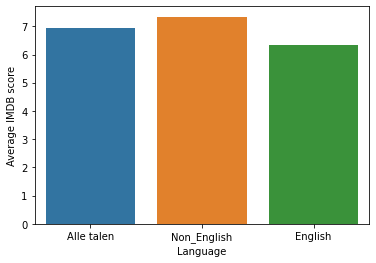

In [57]:
sns.barplot(x='Language', y='Average IMDB score', data=datasheet_scores)

In [12]:
z_scores_alle_Talen = stats.zscore(Alle_talen)

z_score_engels = (Steekproef_Engelstalige_scores-Alle_talen_avg_score)/ statistics.stdev(Alle_talen)
avg_z_score_engels = np.mean(z_score_engels)
avg_p_value_engels = scipy.stats.norm.sf(abs(avg_z_score_engels))

z_score_andere_talen = (Populatie_Andere_Talen-Alle_talen_avg_score)/ statistics.stdev(Alle_talen)
avg_z_score_andere_talen = np.mean(z_score_andere_talen)
avg_p_value_andere_talen = scipy.stats.norm.sf(abs(avg_z_score_andere_talen))

print("De gemiddelde p value van de engelse films is {}".format(avg_p_value_engels))
print("De gemiddelde p value van de niet engelse films is {}".format(avg_p_value_andere_talen))

De gemiddelde p value van de engelse films is 0.27092240944678764
De gemiddelde p value van de niet engelse films is 0.34971420015119714


# Onderzoeksvraag 1 conclusie en uitwerkingen.

In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?

conclusie: door middel van lineare regressie is de omzet van een film te bepalen.

In [13]:
''' van de 5000 rije data hadden er 120 Nan in het colom van movie director likes deze hebben wij eruit gehaald
omdat het relatief weinig is op 5000 rijen data.'''
data_onderzoekvraag_1.dropna(inplace= True)

In [14]:
# data omzetten naar floats
data_onderzoekvraag_1 = data_onderzoekvraag_1.astype(float)
data_onderzoekvraag_1.dtypes
#data_onderzoekvraag_1.head()

imdb_score                   float64
gross                        float64
movie_facebook_likes         float64
director_facebook_likes      float64
cast_total_facebook_likes    float64
num_user_for_reviews         float64
dtype: object

In [15]:
#statistische weergaven van de data
data_onderzoekvraag_1.describe()

,imdb_score,gross,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
count,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000
mean,6.465282,5.261282e+07,9353.829340,807.336528,11527.101970,336.843184
std,1.056247,7.031787e+07,21462.889123,3068.171683,19122.176905,411.227368
min,1.600000,1.620000e+02,0.000000,0.000000,0.000000,4.000000
25%,5.900000,8.270233e+06,0.000000,11.000000,1919.750000,110.000000
50%,6.600000,3.009311e+07,227.000000,64.000000,4059.500000,210.000000
75%,7.200000,6.688194e+07,11000.000000,235.000000,16240.000000,398.250000
max,9.300000,7.605058e+08,349000.000000,23000.000000,656730.000000,5060.000000


In [16]:
# de kenmerken (populariteit) en de target (omzet)
populariteit = ['movie_facebook_likes','director_facebook_likes','cast_total_facebook_likes','num_user_for_reviews']
omzet = ['gross']

In [17]:
X= data_onderzoekvraag_1[populariteit]
y= data_onderzoekvraag_1[omzet]

In [18]:
X.head()

,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
0,33000.0,0.0,4834.0,3054.0
1,0.0,563.0,48350.0,1238.0
2,85000.0,0.0,11700.0,994.0
3,164000.0,22000.0,106759.0,2701.0
5,24000.0,475.0,1873.0,738.0


In [19]:
y.head()

,gross
0,760505847.0
1,309404152.0
2,200074175.0
3,448130642.0
5,73058679.0


In [20]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_reg_model = LinearRegression()

In [23]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_reg_model.predict(X_test)

error_metric = np.sqrt(mean_squared_error(y_pred=y_pred_test, y_true=y_test))
print(error_metric)

60523992.777248286


Text(0.5, 1.0, 'voorspelling tegen over daadwerkelijke data')

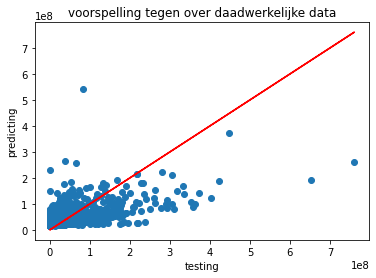

In [25]:
# model plotten en lineare regressie er in verwerken
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('testing')
ax.set_ylabel('predicting')
ax.set_title('voorspelling tegen over daadwerkelijke data')

In [26]:
# bij deze code wordt de omzet voorspelt op basis van de ingevulde waardes
from collections import OrderedDict
new_data = OrderedDict([
    ('movie_facebook_likes',164000),
    ('director_facebook_likes',22000),
    ('cast_total_facebook_likes',126759),
    ('num_of_user_reviews',2700)
])

new_data = pd.Series(new_data).values.reshape(1,-1)

linear_reg_model.predict(new_data)

array([[3.88982973e+08]])

# Clustering 

In [27]:
#Normalizeren van de data
#De data heeft veel verschillende niveaus van nummers vandaar dat de normalisering nodig is
scaled_data_vraag_1 = whiten(data_onderzoekvraag_1)
print(scaled_data_vraag_1)

[[7.48030878e+00 1.08166977e+01 1.53774236e+00 0.00000000e+00
  2.52829145e-01 7.42753733e+00]
 [6.72280915e+00 4.40066461e+00 0.00000000e+00 1.83521335e-01
  2.52881447e+00 3.01090086e+00]
 [6.43874680e+00 2.84566104e+00 3.96085154e+00 0.00000000e+00
  6.11936490e-01 2.41747613e+00]
 ...
 [6.62812170e+00 6.04137432e-03 8.85366815e-01 9.48573860e-02
  1.92472332e-02 9.02297430e-01]
 [6.53343425e+00 2.90280669e-02 0.00000000e+00 0.00000000e+00
  7.68843282e-03 3.16168911e-01]
 [6.24937189e+00 1.21211508e-03 2.12488036e-02 5.21552638e-03
  8.52526905e-03 2.04293758e-01]]


In [28]:
#genormaliseerde data in een df plaatsen
scaled_df_vraag1 = pd.DataFrame(scaled_data_vraag_1,columns=['imdb_score','gross','movie_facebook_likes','director_facebook_likes','cast_total_facebook_likes','num_user_for_reviews'])
scaled_df_vraag1.head()

,imdb_score,gross,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
0,7.480309,10.816698,1.537742,0.000000,0.252829,7.427537
1,6.722809,4.400665,0.000000,0.183521,2.528814,3.010901
2,6.438747,2.845661,3.960852,0.000000,0.611936,2.417476
3,8.048433,6.373776,7.642114,7.171349,5.583737,6.569017
4,6.249372,1.039116,1.118358,0.154836,0.097962,1.794867


<AxesSubplot:xlabel='[movie_facebook_likes]', ylabel='[gross]'>

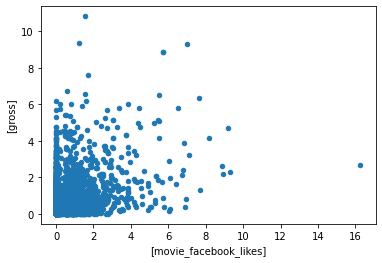

In [29]:
scaled_df_vraag1.plot.scatter(x=['movie_facebook_likes'],y=['gross'])

In [30]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [31]:
y_predicted = km.fit_predict(scaled_df_vraag1 [['movie_facebook_likes','gross']])
y_predicted

array([3, 3, 1, ..., 5, 2, 2])

In [32]:
km.cluster_centers_

array([[0.21046726, 1.74788094],
       [3.63582872, 1.42019951],
       [0.06767345, 0.3106149 ],
       [1.20304534, 4.29144447],
       [6.99532981, 4.6025828 ],
       [1.30012146, 0.60558572]])

In [33]:
scaled_df_vraag1['cluster']= y_predicted
scaled_df_vraag1.head()

,imdb_score,gross,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,cluster
0,7.480309,10.816698,1.537742,0.000000,0.252829,7.427537,3
1,6.722809,4.400665,0.000000,0.183521,2.528814,3.010901,3
2,6.438747,2.845661,3.960852,0.000000,0.611936,2.417476,1
3,8.048433,6.373776,7.642114,7.171349,5.583737,6.569017,4
4,6.249372,1.039116,1.118358,0.154836,0.097962,1.794867,5


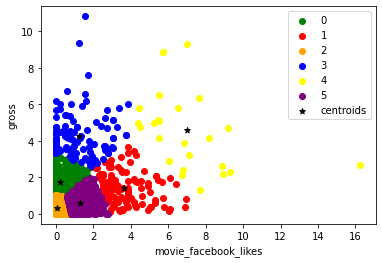

In [34]:
#alle clusters zelf bepalen voor het plotten
df1 = scaled_df_vraag1[scaled_df_vraag1.cluster==0]
df2 = scaled_df_vraag1[scaled_df_vraag1.cluster==1]
df3 = scaled_df_vraag1[scaled_df_vraag1.cluster==2]
df4 = scaled_df_vraag1[scaled_df_vraag1.cluster==3]
df5 = scaled_df_vraag1[scaled_df_vraag1.cluster==4]
df6 = scaled_df_vraag1[scaled_df_vraag1.cluster==5]

#plotten van de clusters
plt.scatter(df1['movie_facebook_likes'],df1['gross'], color='green',label='0')
plt.scatter(df2['movie_facebook_likes'],df2['gross'], color='red',label='1')
plt.scatter(df3['movie_facebook_likes'],df3['gross'], color='orange',label='2')
plt.scatter(df4['movie_facebook_likes'],df4['gross'], color='blue',label='3')
plt.scatter(df5['movie_facebook_likes'],df5['gross'], color='yellow',label='4')
plt.scatter(df6['movie_facebook_likes'],df6['gross'], color='purple',label='5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker = '*',label='centroids')

plt.xlabel('movie_facebook_likes')
plt.ylabel('gross')
plt.legend()

In [35]:
# de optimale clusters bepalen aan de hand van de elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df_vraag1)
    distortions.append(kmeanModel.inertia_)

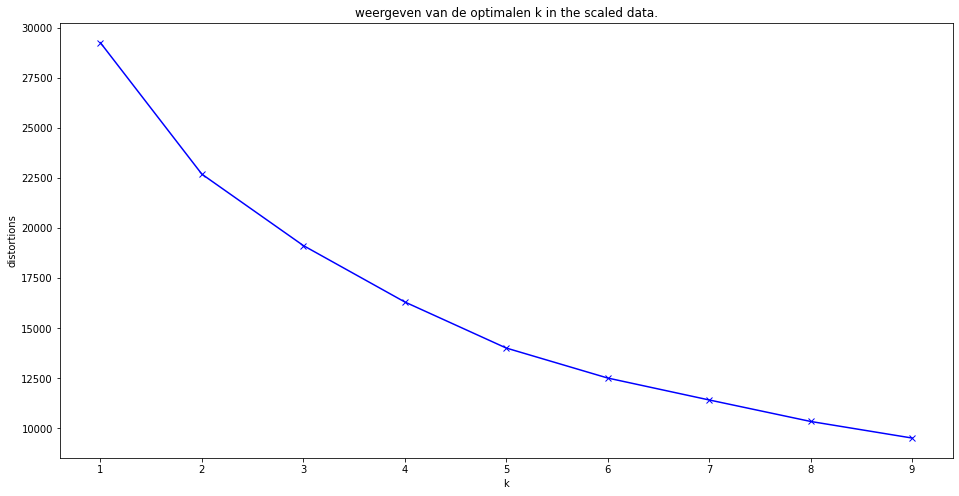

In [36]:
plt.figure(figsize= (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('weergeven van de optimalen k in the scaled data.')
plt.show()

bij 3 clusters zit de knik echter vonden wij dat 6 cluster beter was bij ons model. 

# Onderzoeksvraag 2 conclusie en uitwerkingen.
Onderzoeksvraag: welke kenmerken van een film bepalen de imdb score?

Conclusie: Er lijkt zich tussen geen van de kenmerken die in onze dataset staan een duidelijke correlatie te bevinden ten opzichte van de imdb-score. Zoals in de tabel hieronder te zien dat enkel en alleen tussen de duration en de imdb-score een matige correlatie bestaat. De correlatie coëfficient is namelijk 0.366 waar je bij 0.3-0.69 een matige correlatie hebt. In de grafieken daaronder is te zien dat bijvoorbeeld het gross/imdb-score en de duration/imdb-score wel deels gepaard lijken te stijgen, maar dus niet van elkaar afhankelijk zijn.


In [37]:
# Find correlation coefficient.
data_onderzoekvraag_2[['duration','gross','budget', 'imdb_score']].corr()

,duration,gross,budget,imdb_score
duration,1.000000,0.245726,0.068012,0.366221
gross,0.245726,1.000000,0.099496,0.214740
budget,0.068012,0.099496,1.000000,0.029190
imdb_score,0.366221,0.214740,0.029190,1.000000


<AxesSubplot:xlabel='imdb_score', ylabel='gross'>

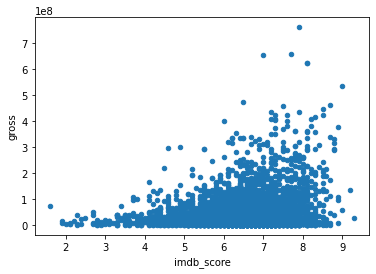

In [38]:
data_onderzoekvraag_2.plot.scatter(x = 'imdb_score', y = 'gross')

#### Graph gross/imdb-score
We verwachtten dat de correlatie tussen het gross en de imdb score de meest duidelijke zou zijn. Simpelweg omdat als een film een goede imdb score krijgt (en dus waarschijnlijk van hoge kwaliteit is) het logisch is dat de film ook meer opbrengt. Deze hypothese lijkt na het plotten van de twee variablen voor sommige films te kloppen alhoewel het blijkbaar niet altijd zo is, het merendeel van de films met een imdb-score boven de 5 heeft namelijk juist steeds een redelijk lage opbrengst. En dat terwijl de imdb-score toch hoog is. Wat betreft de films met een imdb-score onder de 5 komt de grafiek wel overeen met onze verwachtingen.

<AxesSubplot:xlabel='imdb_score', ylabel='title_year'>

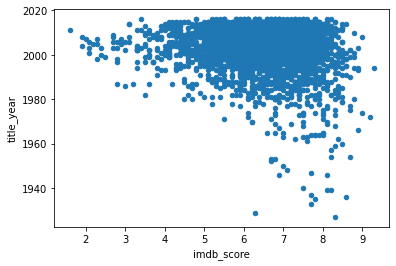

In [39]:
data_onderzoekvraag_2.plot.scatter(x = 'imdb_score', y = 'title_year')

#### Graph title_year/imdb_score
Over de correlatie tussen de imdb-score en het title_year vonden we het lastig om een hypothese op te stellen. We gingen ervan uit dat de nieuwere films over het algemeen een betere imdb-score zouden hebben doordat ze relevanter zouden zijn voor het publiek. Na het plotten bleek echter dat zo goed als alle oudere films juist een zeer positieve score hadden gekregen. Dit kwam dus niet echt overeen met onze hypothese, maar achteraf is het toch best logisch. Simpelweg omdat de meeste oudere films de test van tijd niet hebben doorstaan en dus alleen de beste zijn meegenomen en in de database staan. Een ander component dat wellicht meespeelt in dit resultaat is dat de filmwereld veel minder toegankelijk was vroeg en dus alleen grotere producties films konden maken waardoor de kwaliteit hoger zou zijn (logischerwijs voornamelijk qua inhoud en verhaal ten opzichte van techniek).

<AxesSubplot:xlabel='imdb_score', ylabel='budget'>

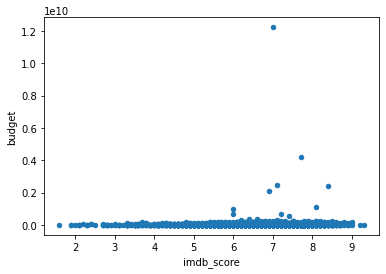

In [40]:
data_onderzoekvraag_2.plot.scatter(x = 'imdb_score', y = 'budget')

#### Graph budget/imdb-score
Onze verwachtingen over de correlatie tussen het budget en de imdb_score waren dat het budget een redelijk grote impact zou hebben op de imdb-score. Het leek ons logisch dat des te meer een productie heeft om uit te geven aan de film des te beter het resultaat zou zijn. Dit bleek echter niet te kloppen, sterker nog het budget leek nauwelijks invloed te hebben op de imdb-score. De paar uitschieters die we zien in de grafiek zijn wel allemaal films met een score van 6 of hoger maar het is zeker niet genoeg om te concluderen dat er een correlatie bestaat.

Nou is het in onze ogen ook goed dat deze correlatie niet bestaat, want geld zou geen grote factor moeten spelen in de rating van een film.

<AxesSubplot:xlabel='imdb_score', ylabel='duration'>

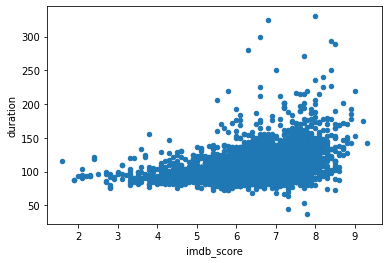

In [41]:
data_onderzoekvraag_2.plot.scatter(x = 'imdb_score', y = 'duration')

#### Graph duration/imdb-score
Over de correlatie tussen de duration en de imdb-score vonden we het ook lastig om een hypothese op te stellen. Het enige dat ons logisch leek was dat hele lange films wellicht een lagere imdb-score zouden krijgen doordat het vaak lastig is om zo lang de aandacht van het publiek erbij te houden. Dit bleek niet correct te zijn, want de meeste langere films scoren juist hoger dan dan kortere films. Volgens ons kan dit komen doordat er in een langere film meer tijd is om een verhaal gedetailleerder uit te leggen, maar naast dat hebben we geen idee waarom langere films het beter doen dan kortere films.

# Onderzoeksvraag 3 conclusie en uitwerkingen.
Onderzoeksvraag: Welke genres zijn over de loop van de jaren populairder geworden?

Conclusie: 
zo goed als alle genres zijn beter gaan lopen, dat heeft ermee te maken dat de film industrie een stuk groter is geworden vergeleken met vorige eeuw. Een paar uitzonderingen zijn: Western, musical en thriller (op basis van de dataset). Die zijn volgens de cijfers eigenlijk niet meer uitgebracht.

Note: Omdat natuurlijk niet alle films ooit in deze dataset staan, zijn de antwoorden niet 100% exact, zo geloof ik persoonlijk niet dat er geen Thrillers meer gemaakt zijn. (Die heeft namelijk een 0)

In [42]:
# gemaakt voor de main loop in cell 45. 
# Maakt een lijst aan met alle genres één keer daarin. 17 in totaal
all_genres_duplicates = data_onderzoekvraag_3['main_genre'].values.tolist()
all_genres_once = []
for i in all_genres_duplicates: 
    if i not in all_genres_once: 
        all_genres_once.append(i) 
        
all_genres_once.sort()   
Genres_Dataset = pd.DataFrame(all_genres_once, columns =['Genre']) # Maakt een dataset met de vergaarde informatie
#print(all_genres_once)

In [43]:
# gemaakt voor de main loop in cell 45. 
# Maakt een gesorteerde lijst aan met alle jaren uit de dataset één keer daarin. 
# 1959-2016. Van 1927 tot 1959 missen er een paar.
all_years_duplicates = data_onderzoekvraag_3['title_year'].values.tolist()
all_years_once = []
for i in all_years_duplicates: 
    if i not in all_years_once:
        all_years_once.append(i) 
        
all_years_once = [round(x) for x in all_years_once]
all_years_once.sort()
Years_Dataset = pd.DataFrame(all_years_once, columns =['Year']) # Maakt een dataset met de vergaarde informatie
#print(all_years_once)

In [47]:
# De main loop die alle data goed zet zodat ik de data mooi kan visualizen
# Een for loop die die voor elk genre en jaar de gemiddelde imdb score uitrekent. 17*74 = 1258 gemiddelden
uitslag = [] 
for i in range(len(all_genres_once)): 
    genre = all_genres_once[i]
    for i in range(len(all_years_once)):
        year = all_years_once[i]
        for i in range(len(all_years_once)):
                    x = data_onderzoekvraag_3.loc[(data_onderzoekvraag_3['main_genre'] == genre) & (data_onderzoekvraag_3['title_year'] == year)] # selecteert de data die voldoet aan de eisen voor de loop. Bijv.: alle films uit het genre Action en uit het jaar 1982 of alle films uit het genre Western en uit het jaar 1985 
                    avg = []
                    for i in range(len(x['imdb_score'])): # als er geen film is uitgebracht in een bepaald jaar en genre word de uitkomst automatisch 0.
                        avg.append(i)  
                    if len(avg) > 0:
                        average = np.mean(x['imdb_score']) # berekent het gemiddelde als er een film is uitgebracht in dat jaar en genre.
                    else:
                        average = 0 # als er geen film is uitgebracht in een bepaald jaar en genre word de uitkomst automatisch 0. Anders krijg je 'divide by zero' error.
        print('Het gemiddelde van het jaar {} voor het genre {} is: {}'.format(year, genre, average))
        out = (year, genre, average)
        uitslag.append(out) # stopt alle uitkomsten in de lijst 'uitslag'. (year, genre, average).

#print(uitslag)

Het gemiddelde van het jaar 1927 voor het genre Action is: 0
Het gemiddelde van het jaar 1929 voor het genre Action is: 0
Het gemiddelde van het jaar 1933 voor het genre Action is: 0
Het gemiddelde van het jaar 1935 voor het genre Action is: 0
Het gemiddelde van het jaar 1936 voor het genre Action is: 0
Het gemiddelde van het jaar 1937 voor het genre Action is: 0
Het gemiddelde van het jaar 1939 voor het genre Action is: 0
Het gemiddelde van het jaar 1940 voor het genre Action is: 0
Het gemiddelde van het jaar 1946 voor het genre Action is: 0
Het gemiddelde van het jaar 1947 voor het genre Action is: 0
Het gemiddelde van het jaar 1948 voor het genre Action is: 0
Het gemiddelde van het jaar 1950 voor het genre Action is: 0
Het gemiddelde van het jaar 1952 voor het genre Action is: 0
Het gemiddelde van het jaar 1953 voor het genre Action is: 0
Het gemiddelde van het jaar 1954 voor het genre Action is: 8.7
Het gemiddelde van het jaar 1957 voor het genre Action is: 0
Het gemiddelde van het

Het gemiddelde van het jaar 1992 voor het genre Adventure is: 6.866666666666667
Het gemiddelde van het jaar 1993 voor het genre Adventure is: 6.416666666666668
Het gemiddelde van het jaar 1994 voor het genre Adventure is: 7.0
Het gemiddelde van het jaar 1995 voor het genre Adventure is: 7.140000000000001
Het gemiddelde van het jaar 1996 voor het genre Adventure is: 6.214285714285714
Het gemiddelde van het jaar 1997 voor het genre Adventure is: 7.12
Het gemiddelde van het jaar 1998 voor het genre Adventure is: 6.3
Het gemiddelde van het jaar 1999 voor het genre Adventure is: 6.75
Het gemiddelde van het jaar 2000 voor het genre Adventure is: 6.0058823529411764
Het gemiddelde van het jaar 2001 voor het genre Adventure is: 6.6923076923076925
Het gemiddelde van het jaar 2002 voor het genre Adventure is: 6.25
Het gemiddelde van het jaar 2003 voor het genre Adventure is: 6.038461538461538
Het gemiddelde van het jaar 2004 voor het genre Adventure is: 6.885714285714285
Het gemiddelde van het ja

Het gemiddelde van het jaar 1966 voor het genre Biography is: 0
Het gemiddelde van het jaar 1967 voor het genre Biography is: 0
Het gemiddelde van het jaar 1968 voor het genre Biography is: 0
Het gemiddelde van het jaar 1969 voor het genre Biography is: 8.1
Het gemiddelde van het jaar 1970 voor het genre Biography is: 0
Het gemiddelde van het jaar 1971 voor het genre Biography is: 0
Het gemiddelde van het jaar 1972 voor het genre Biography is: 0
Het gemiddelde van het jaar 1973 voor het genre Biography is: 0
Het gemiddelde van het jaar 1974 voor het genre Biography is: 0
Het gemiddelde van het jaar 1975 voor het genre Biography is: 0
Het gemiddelde van het jaar 1976 voor het genre Biography is: 0
Het gemiddelde van het jaar 1977 voor het genre Biography is: 0
Het gemiddelde van het jaar 1978 voor het genre Biography is: 0
Het gemiddelde van het jaar 1979 voor het genre Biography is: 7.6
Het gemiddelde van het jaar 1980 voor het genre Biography is: 6.4
Het gemiddelde van het jaar 1981 v

Het gemiddelde van het jaar 2012 voor het genre Comedy is: 6.1605263157894745
Het gemiddelde van het jaar 2013 voor het genre Comedy is: 6.133333333333334
Het gemiddelde van het jaar 2014 voor het genre Comedy is: 6.148148148148148
Het gemiddelde van het jaar 2015 voor het genre Comedy is: 6.25
Het gemiddelde van het jaar 2016 voor het genre Comedy is: 5.814285714285715
Het gemiddelde van het jaar 1927 voor het genre Crime is: 0
Het gemiddelde van het jaar 1929 voor het genre Crime is: 0
Het gemiddelde van het jaar 1933 voor het genre Crime is: 0
Het gemiddelde van het jaar 1935 voor het genre Crime is: 0
Het gemiddelde van het jaar 1936 voor het genre Crime is: 0
Het gemiddelde van het jaar 1937 voor het genre Crime is: 0
Het gemiddelde van het jaar 1939 voor het genre Crime is: 0
Het gemiddelde van het jaar 1940 voor het genre Crime is: 0
Het gemiddelde van het jaar 1946 voor het genre Crime is: 0
Het gemiddelde van het jaar 1947 voor het genre Crime is: 7.7
Het gemiddelde van het ja

Het gemiddelde van het jaar 1991 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1992 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1993 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1994 voor het genre Documentary is: 8.3
Het gemiddelde van het jaar 1995 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1996 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1997 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1998 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1999 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2000 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2001 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2002 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2003 voor het genre Documentary is: 2.7
Het gemiddelde van het jaar 2004 voor het genre Documentary is: 7.05
Het gemiddelde van het jaar 2005 voor het genre Documentary is: 7.699

Het gemiddelde van het jaar 1970 voor het genre Family is: 0
Het gemiddelde van het jaar 1971 voor het genre Family is: 0
Het gemiddelde van het jaar 1972 voor het genre Family is: 0
Het gemiddelde van het jaar 1973 voor het genre Family is: 0
Het gemiddelde van het jaar 1974 voor het genre Family is: 0
Het gemiddelde van het jaar 1975 voor het genre Family is: 0
Het gemiddelde van het jaar 1976 voor het genre Family is: 0
Het gemiddelde van het jaar 1977 voor het genre Family is: 0
Het gemiddelde van het jaar 1978 voor het genre Family is: 0
Het gemiddelde van het jaar 1979 voor het genre Family is: 0
Het gemiddelde van het jaar 1980 voor het genre Family is: 0
Het gemiddelde van het jaar 1981 voor het genre Family is: 0
Het gemiddelde van het jaar 1982 voor het genre Family is: 7.9
Het gemiddelde van het jaar 1983 voor het genre Family is: 0
Het gemiddelde van het jaar 1984 voor het genre Family is: 0
Het gemiddelde van het jaar 1985 voor het genre Family is: 0
Het gemiddelde van het

Het gemiddelde van het jaar 1950 voor het genre Horror is: 0
Het gemiddelde van het jaar 1952 voor het genre Horror is: 0
Het gemiddelde van het jaar 1953 voor het genre Horror is: 0
Het gemiddelde van het jaar 1954 voor het genre Horror is: 0
Het gemiddelde van het jaar 1957 voor het genre Horror is: 0
Het gemiddelde van het jaar 1959 voor het genre Horror is: 0
Het gemiddelde van het jaar 1960 voor het genre Horror is: 8.5
Het gemiddelde van het jaar 1961 voor het genre Horror is: 0
Het gemiddelde van het jaar 1962 voor het genre Horror is: 0
Het gemiddelde van het jaar 1963 voor het genre Horror is: 0
Het gemiddelde van het jaar 1964 voor het genre Horror is: 0
Het gemiddelde van het jaar 1965 voor het genre Horror is: 0
Het gemiddelde van het jaar 1966 voor het genre Horror is: 0
Het gemiddelde van het jaar 1967 voor het genre Horror is: 0
Het gemiddelde van het jaar 1968 voor het genre Horror is: 0
Het gemiddelde van het jaar 1969 voor het genre Horror is: 0
Het gemiddelde van het

Het gemiddelde van het jaar 2011 voor het genre Musical is: 0
Het gemiddelde van het jaar 2012 voor het genre Musical is: 0
Het gemiddelde van het jaar 2013 voor het genre Musical is: 0
Het gemiddelde van het jaar 2014 voor het genre Musical is: 0
Het gemiddelde van het jaar 2015 voor het genre Musical is: 0
Het gemiddelde van het jaar 2016 voor het genre Musical is: 0
Het gemiddelde van het jaar 1927 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1929 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1933 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1935 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1936 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1937 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1939 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1940 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1946 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1947 voor het genre Mystery is: 0
Het gemi

Het gemiddelde van het jaar 1996 voor het genre Romance is: 0
Het gemiddelde van het jaar 1997 voor het genre Romance is: 0
Het gemiddelde van het jaar 1998 voor het genre Romance is: 0
Het gemiddelde van het jaar 1999 voor het genre Romance is: 0
Het gemiddelde van het jaar 2000 voor het genre Romance is: 0
Het gemiddelde van het jaar 2001 voor het genre Romance is: 0
Het gemiddelde van het jaar 2002 voor het genre Romance is: 0
Het gemiddelde van het jaar 2003 voor het genre Romance is: 0
Het gemiddelde van het jaar 2004 voor het genre Romance is: 0
Het gemiddelde van het jaar 2005 voor het genre Romance is: 0
Het gemiddelde van het jaar 2006 voor het genre Romance is: 0
Het gemiddelde van het jaar 2007 voor het genre Romance is: 0
Het gemiddelde van het jaar 2008 voor het genre Romance is: 0
Het gemiddelde van het jaar 2009 voor het genre Romance is: 0
Het gemiddelde van het jaar 2010 voor het genre Romance is: 0
Het gemiddelde van het jaar 2011 voor het genre Romance is: 7.1
Het ge

Het gemiddelde van het jaar 1981 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1982 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1983 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1984 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1985 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1986 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1987 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1988 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1989 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1990 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1991 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1992 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1993 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1994 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1995 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1996 voor het genre Thrille

In [48]:
Uitslag2 = data_onderzoekvraag_3.groupby(['main_genre', 'title_year']).imdb_score.agg(['mean'])
Uitslag2

mean
main_genre title_year      
Action     1954.0      8.70
           1962.0      7.30
           1963.0      7.55
           1964.0      7.90
           1965.0      7.00
...                     ...
Sci-Fi     2010.0      6.10
           2015.0      6.40
Thriller   2014.0      4.80
Western    1966.0      8.90
           1985.0      7.30

[400 rows x 1 columns]

In [49]:
df_by_year = Uitslag2.groupby('title_year')
df_by_year.head()

mean
main_genre title_year          
Action     1954.0      8.700000
           1962.0      7.300000
           1963.0      7.550000
           1964.0      7.900000
           1965.0      7.000000
...                         ...
Horror     1979.0      8.500000
           1981.0      6.533333
Musical    1929.0      6.300000
           1978.0      7.200000
Western    1966.0      8.900000

[261 rows x 1 columns]

In [50]:
# zet de data van de main loop in een dataset. Met die dataset maak ik de visualisations
Uitslag_Dataset = pd.DataFrame(uitslag, columns =['Year', 'Genre', 'Average']) # Maakt een dataset met de vergaarde informatie

In [51]:
# een interactieve visualisatie waar per jaar gekeken kan werden wat de gemiddelde score is van de genres (als dat genre is uitgebracht in dat jaar).
select_year = alt.selection_single(
    name='Select', fields=['Year'], init={'Year': 2016},
    bind=alt.binding_range(min=1927, max=2016, step=1)) # dit zorgt ervoor dat er per jaar gekeken kan worden.

# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)
alt.Chart(Uitslag_Dataset).mark_point(filled=True).encode(
    alt.X('Average'),
    alt.Y('Year'),
    alt.Color('Genre'),
    alt.OpacityValue(1),
    tooltip = [
               alt.Tooltip('Genre'),
               alt.Tooltip('Year'),
               alt.Tooltip('Average')
              ]
).add_selection(select_year).transform_filter(select_year).interactive() 

alt.Chart(...)

In [52]:
# een interactieve visualisatie waar je het totaal plaatje kan zien, alle jaren in een tabel gezet. 

alt.Chart(Uitslag_Dataset).mark_point(filled=True).encode(
    alt.X('Average'),
    alt.Y('Year'),
    alt.Color('Genre'),
    alt.OpacityValue(1),
    tooltip = [
               alt.Tooltip('Genre'),
               alt.Tooltip('Year'),
               alt.Tooltip('Average')
              ]
).interactive()
# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)

alt.Chart(...)

In [53]:
brush = alt.selection_interval() # zorgt ervoor dat je een gebied kan selecteren.
# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)

points = alt.Chart(Uitslag_Dataset).mark_point().encode(x='Year', y='Average', 
                                                        color=alt.condition(brush, 'Genre', alt.value('lightgray'))
                                                       ).add_selection(brush)
bars = alt.Chart(Uitslag_Dataset).mark_bar().encode(y='Average', color='Genre', x='Year').transform_filter(brush)

points & bars

alt.VConcatChart(...)

In [54]:
alt.Chart(Uitslag_Dataset).mark_line().encode(
    x='Year',
    y='Average',
    color='Genre',
    tooltip = [alt.Tooltip('Genre'), alt.Tooltip('Year'), alt.Tooltip('Average')]
).interactive()
# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)

alt.Chart(...)

# Onderzoeksvraag 4 conclusie en uitwerkingen.
Onderzoeksvraag: In hoeverre heeft de release date van een sequel invloed om de IMDB score van die sequel?

Conclusie: 
Uit de resultaten van dit onderzoek kan ten eerste geconcludeerd worden dat de beste tijd om het vervolg van een film uit te brengen is: het zelfde jaar. Zo houd je de mensen in de hype, als het langer duurt zal de hype minder en zo dus ook de rating.
Andere leuke feitjes waar we achter zijn gekomen:
De tweede film komt gemiddeld 5 jaar later uit en de rating is met 0.6 omlaag gegaan

Note: Boven de 10 jaar worden de uitslagen minder exact, puur omdat er maar weinig films zijn die bijvoorbeeld 13 jaar na de eerste uit kwamen. Omdat die uitslagen minder reliable zijn. kijken we daar minder naar, de echte uitslagen zijn 0-10 jaar.

In [44]:
All_First_Movies = data_onderzoekvraag_4.loc[(data_onderzoekvraag_4['Order'] == 1)] # plaatst alle films die de eerste in de serie zijn in lijst
All_Second_Movies = data_onderzoekvraag_4.loc[(data_onderzoekvraag_4['Order'] == 2)] # plaatst alle films die de tweede in de serie zijn in lijst
Avg_All_First_Movies = np.mean(All_First_Movies['IMDb Rating']) # gemiddelde rating van alle eerste films
Avg_All_Second_Movies = np.mean(All_Second_Movies['IMDb Rating']) # gemiddelde rating van alle tweede films
IMDB_diff_1vs2 = Avg_All_First_Movies - Avg_All_Second_Movies # het gemiddelde verschil van de 2 gemiddelden

All_First_Movies_Release = All_First_Movies['Year'] # alle jaren van de eerste film in een lijst
All_Second_Movies_Release = All_Second_Movies['Year'] # alle jaren van de tweede film in een lijst
Avg_Release_Year_First = np.mean(All_First_Movies_Release) # gemiddelde jaar van alle eerste films
Avg_Release_Year_Second = np.mean(All_Second_Movies_Release) # gemiddelde jaar van alle tweede films
Diff_Release_1vs2 = Avg_Release_Year_Second - Avg_Release_Year_First #gemiddelde verschil tussen uitbrengst eerste en tweede film

print(IMDB_diff_1vs2)
print(Diff_Release_1vs2)

0.6044213824574696
5.043320084957941


In [45]:
Data_Tests = data_onderzoekvraag_4.loc[data_onderzoekvraag_4['Order'] < 3 ] # select alle films die eerste of 2 zijn in de serie
Year_Rating_Order = Data_Tests.drop(columns=['Title']) # drop naam, die is niet nodig voor dit onderzoek
List_Year_Rating_Order = Year_Rating_Order.values.tolist() # maakt een list van de waardes

In [46]:
# zet alle combos van films (de eerte en tweede film uit de series) in een lijst.
lst_combo = []
for i in range(len(List_Year_Rating_Order)):
    Year = List_Year_Rating_Order[i][0] 
    Rating = List_Year_Rating_Order[i][1]
    Movie_Series = List_Year_Rating_Order[i][2]
    Order = List_Year_Rating_Order[i][3]
    for i in range(len(List_Year_Rating_Order) -1):
        if List_Year_Rating_Order[i][2] == List_Year_Rating_Order[i+1][2]:
            Film1 = List_Year_Rating_Order[i]
            Film2 = List_Year_Rating_Order[i+1]
            Pair = Film1 + Film2
            if Pair not in lst_combo:
                lst_combo.append(Pair)
                
#print(lst_combo)

In [47]:
# berekent per combo (film 1 en 2 uit een serie) het verschil in jaar en rating
jaar_Verschil = []
for i in range(len(lst_combo)):
    Release_diff = lst_combo[i][4] - lst_combo[i][0]
    Rating_diff = lst_combo[i][1] - lst_combo[i][5]
    opbouw_lst = Release_diff, Rating_diff
    jaar_Verschil.append(opbouw_lst)

In [48]:
# alle jaren die voorkomen één keer in lijst.
all_year_diff_once = []
for i in range(len(jaar_Verschil)):
    jaar = jaar_Verschil[i][0]
    if jaar not in all_year_diff_once:
        all_year_diff_once.append(jaar)

all_year_diff_once.sort()
print(all_year_diff_once)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 20.0, 21.0, 23.0, 35.0]


In [49]:
# Zet alle films met een bepaalde waarde (verschil in jaar) in een lijst. zodat we later het gemiddelde kunnen uitrekenen.
zelfde_jaar = []
een = []
twee= []
drie = []
vier = []
vijf = []
zes = []
zeven = []
acht = []
negen = []
tien = []
elf = []
twaalf = []
dertien = []
veertien = []
vijftien = []
zeventien = []
twintig = []
jaar_21 = []
jaar_23 = []
jaar_35 = []
for i in range(len(jaar_Verschil)):
    if jaar_Verschil[i][0] == 0.0:
        zelfde_jaar.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 1.0:
        een.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 2.0:
        twee.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 3.0:
        drie.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 4.0:
        vier.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 5.0:
        vijf.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 6.0:
        zes.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 7.0:
        zeven.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 8.0:
        acht.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 9.0:
        negen.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 10.0:
        tien.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 11.0:
        elf.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 12.0:
        twaalf.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 13.0:
        dertien.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 14.0:
        veertien.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 15.0:
        vijftien.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 17.0:
        zeventien.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 20.0:
        twintig.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 21.0:
        jaar_21.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 23.0:
        jaar_23.append(jaar_Verschil[i])
    if jaar_Verschil[i][0] == 35.0:
        jaar_35.append(jaar_Verschil[i])

In [50]:
# maakt een dataset van de data en berekent het gemiddelde.
dataset_avg_diff_zelfde_jaar = pd.DataFrame(zelfde_jaar)
avg_diff_zelfde_jaar = np.mean(dataset_avg_diff_zelfde_jaar[1])
dataset_avg_diff_een = pd.DataFrame(een)
avg_diff_een = np.mean(dataset_avg_diff_een[1])
dataset_avg_diff_twee = pd.DataFrame(twee)
avg_diff_twee = np.mean(dataset_avg_diff_twee[1])   
dataset_avg_diff_drie = pd.DataFrame(drie)
avg_diff_drie = np.mean(dataset_avg_diff_drie[1])
dataset_avg_diff_vier = pd.DataFrame(vier)
avg_diff_vier = np.mean(dataset_avg_diff_vier[1])  
dataset_avg_diff_vijf = pd.DataFrame(vijf)
avg_diff_vijf = np.mean(dataset_avg_diff_vijf[1]) 
dataset_avg_diff_zes = pd.DataFrame(zes)
avg_diff_zes = np.mean(dataset_avg_diff_zes[1])
dataset_avg_diff_zeven = pd.DataFrame(zeven) 
avg_diff_zeven = np.mean(dataset_avg_diff_zeven[1])
dataset_avg_diff_acht = pd.DataFrame(acht)
avg_diff_acht = np.mean(dataset_avg_diff_acht[1])
dataset_avg_diff_negen = pd.DataFrame(negen)
avg_diff_negen = np.mean(dataset_avg_diff_negen[1])   
dataset_avg_diff_tien = pd.DataFrame(tien)
avg_diff_tien = np.mean(dataset_avg_diff_tien[1]) 
dataset_avg_diff_elf = pd.DataFrame(elf)
avg_diff_elf = np.mean(dataset_avg_diff_elf[1])   
dataset_avg_diff_twaalf = pd.DataFrame(twaalf)
avg_diff_twaalf = np.mean(dataset_avg_diff_twaalf[1])
dataset_avg_diff_dertien = pd.DataFrame(dertien)
avg_diff_dertien = np.mean(dataset_avg_diff_dertien[1]) 
dataset_avg_diff_veertien = pd.DataFrame(veertien)
avg_diff_veertien = np.mean(dataset_avg_diff_veertien[1]) 
dataset_avg_diff_vijftien = pd.DataFrame(vijftien)
avg_diff_vijftien = np.mean(dataset_avg_diff_vijftien[1])  
dataset_avg_diff_zeventien = pd.DataFrame(zeventien)
avg_diff_zeventien = np.mean(dataset_avg_diff_zeventien[1])
dataset_avg_diff_twintig = pd.DataFrame(twintig)
avg_diff_twintig = np.mean(dataset_avg_diff_twintig[1])   
dataset_avg_diff_21 = pd.DataFrame(jaar_21)
avg_diff_21 = np.mean(dataset_avg_diff_21[1])
dataset_avg_diff_23 = pd.DataFrame(jaar_23)
avg_diff_23 = np.mean(dataset_avg_diff_23[1]) 
dataset_avg_diff_35 = pd.DataFrame(jaar_35)
avg_diff_35 = np.mean(dataset_avg_diff_35[1])

In [51]:
Dataset_verschil_imdb = pd.DataFrame(np.array([[0, avg_diff_zelfde_jaar], [1, avg_diff_een], [2, avg_diff_twee], [3, avg_diff_drie], [4, avg_diff_vier], [5, avg_diff_vijf], [6, avg_diff_zes], [7, avg_diff_zeven], [8, avg_diff_acht], [9, avg_diff_negen], [10, avg_diff_tien], [11, avg_diff_elf], [12, avg_diff_twaalf], [13, avg_diff_dertien], [14, avg_diff_veertien], [15, avg_diff_vijftien], [17, avg_diff_zeventien], [20, avg_diff_twintig], [21, avg_diff_21], [23, avg_diff_23], [35, avg_diff_35]]), columns=['Aantal Jaren', 'Verschil'])
Dataset_verschil_imdb

,Aantal Jaren,Verschil
0,0.0,0.200000
1,1.0,0.560000
2,2.0,0.622807
3,3.0,0.668056
4,4.0,0.987097
5,5.0,0.800000
6,6.0,0.477778
7,7.0,0.783333
8,8.0,0.471429
9,9.0,1.371429


<AxesSubplot:xlabel='Verschil', ylabel='Aantal Jaren'>

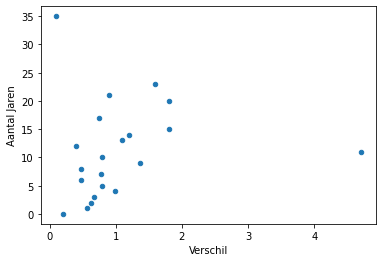

In [52]:
Dataset_verschil_imdb.plot.scatter(x='Verschil', y='Aantal Jaren')

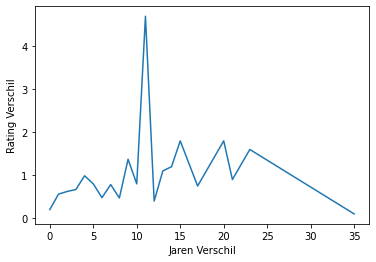

In [53]:
year = Dataset_verschil_imdb['Aantal Jaren']
Verschil = Dataset_verschil_imdb["Verschil"]
plt.plot(year,Verschil)
plt.xlabel('Jaren Verschil')
plt.ylabel('Rating Verschil')
plt.show()